In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

print('Python {}'.format(sys.version))

Python 3.7.1 (default, Dec 14 2018, 13:28:58) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [34]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
 

In [35]:
#Loading dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names= ['id','clump_thickness','univorm_cell_size','uniform_cell_shape', 'marginal_adhesion', 'single_epethelial_size',
        'bare_nuclei','bland_chromatin','normal_nucleoli','mitosis','class']

df=pd.read_csv(url,names=names)



In [36]:
df.replace('?',-99999,inplace=True)
print(df.axes)

df.drop(['id'],1,inplace=True)

#Print Shae of Data
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'univorm_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epethelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class'],
      dtype='object')]
(699, 10)


In [38]:
#Dataset Visualization
print (df.loc[698])
print(df.describe())

clump_thickness            4
univorm_cell_size          8
uniform_cell_shape         8
marginal_adhesion          5
single_epethelial_size     4
bare_nuclei                5
bland_chromatin           10
normal_nucleoli            4
mitosis                    1
class                      4
Name: 698, dtype: object
       clump_thickness  univorm_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epethelial_size  bland_chromatin  \
count         699.000000      

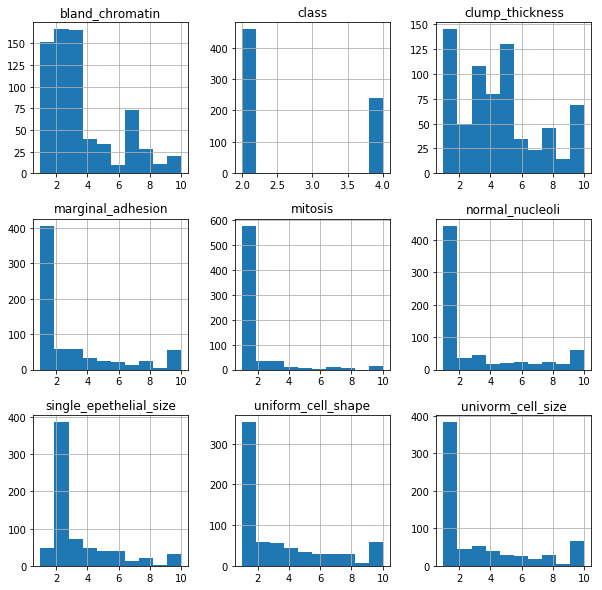

In [39]:
#Plot histogram

df.hist(figsize=(10,10))
plt.show()

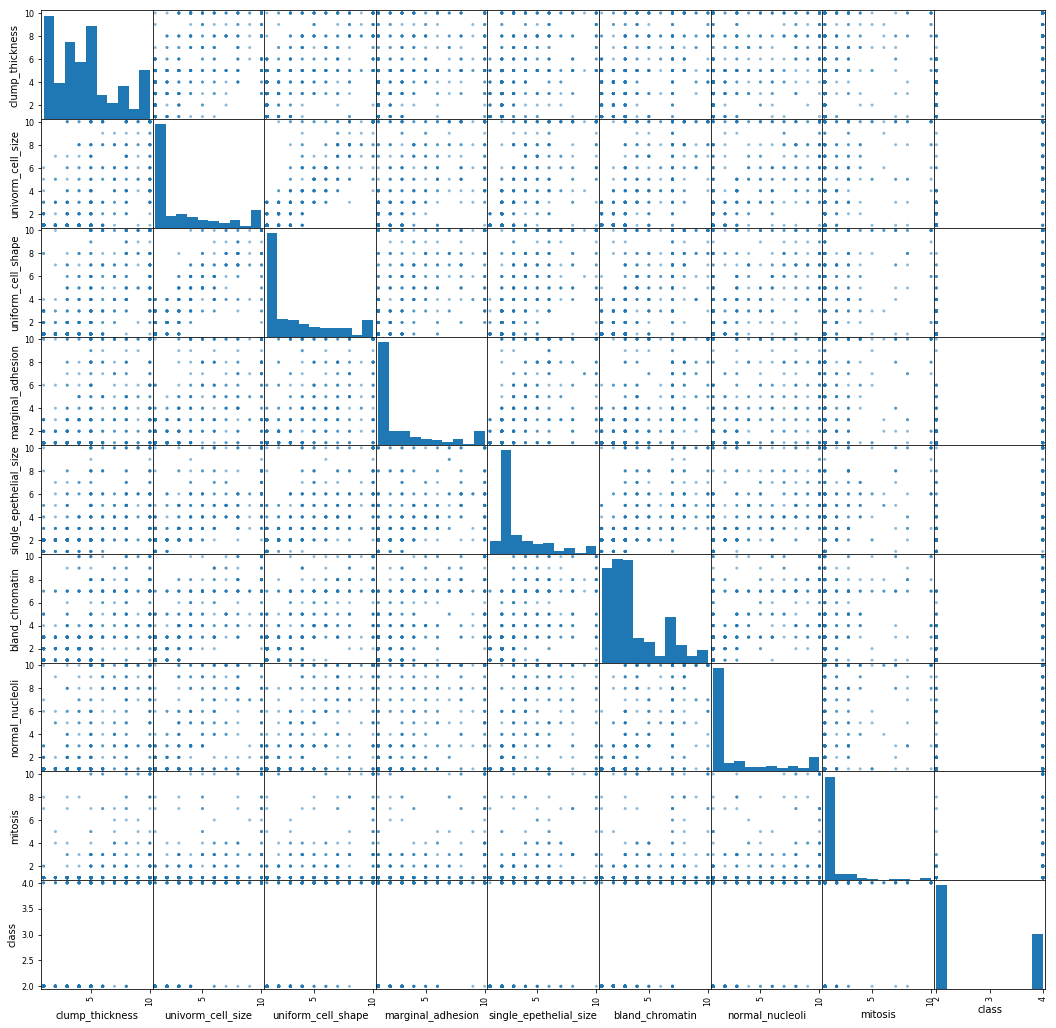

In [40]:
#Create a scatter plot matrix
scatter_matrix(df,figsize=(18,18))
plt.show()


In [56]:
#Create X & Y datasets for training

X=np.array(df.drop(['class'],1))
y=np.array(df['class'])

X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)

In [57]:
#Specify options

seed=8
scoring='accuracy'

In [58]:
models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))

#Evaluate model

results=[]
names=[]


for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results= model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    print (name)
    print(cv_results.mean())
    print(cv_results.std())

KNN
0.9660389610389611
0.02025630590271637
SVM
0.9535389610389611
0.021385459386363322


/Users/aravinsivakumar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aravinsivakumar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aravinsivakumar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aravinsivakumar/an

In [59]:
#Make predictions on validation data set

for name, model in models:
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print (classification_report(y_test,predictions))

KNN
0.9642857142857143
              precision    recall  f1-score   support

           2       0.97      0.98      0.97        89
           4       0.96      0.94      0.95        51

   micro avg       0.96      0.96      0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

SVM
0.95
              precision    recall  f1-score   support

           2       1.00      0.92      0.96        89
           4       0.88      1.00      0.94        51

   micro avg       0.95      0.95      0.95       140
   macro avg       0.94      0.96      0.95       140
weighted avg       0.96      0.95      0.95       140



/Users/aravinsivakumar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [60]:
clf=SVC()

clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)

example=np.array([[4,2,1,1,1,2,3,2,10]])
example= example.reshape(len(example),-1)
prediction= clf.predict(example)
print(prediction)



0.95
[4]


/Users/aravinsivakumar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [61]:

if (prediction==4):
    print ("Tumour is Malignant!!!!")
else:
    print("Tumour is Benign")

Tumour is Malignant!!!!
